### import libraries

In [1]:
import pandas as pd
import numpy as np  #all data processing lib files
import matplotlib.pyplot as plt# all data visualization files
import seaborn as sns

In [3]:
%matplotlib inline #the result appear on the jupyternotebook

### read data files

In [4]:
ColumnLabels = ['UserId','ItemId','Rating','TimeStamp']##columns initialized

In [5]:
Df = pd.read_csv('file.tsv',sep='\t',names = ColumnLabels)

In [6]:
Df.head()

,UserId,ItemId,Rating,TimeStamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [9]:
MovieTitles = pd.read_csv('Movie_Id_Titles.csv')

In [10]:
MovieTitles.head()

,ItemId,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
#now merge the MovieTitles into DF

Df = pd.merge(Df,MovieTitles,on="ItemId")

In [12]:
Df.head()

,UserId,ItemId,Rating,TimeStamp,Title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### Visualization

In [16]:
Df.groupby('Title')['Rating'].mean().sort_values(ascending=False).head()#sort the dataframe based on Average Rating

Title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Rating, dtype: float64

In [17]:
Df.groupby('Title')['Rating'].count().sort_values(ascending=False).head()#sort the dataframe based on Count of Rating

Title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Rating, dtype: int64

In [18]:
### creating an avg dataframe with average and number of ratings

In [21]:
Ratings = pd.DataFrame(Df.groupby('Title')['Rating'].mean())

In [22]:
Ratings.head()

,Rating
Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [23]:
Ratings['RatingsCount'] = pd.DataFrame(Df.groupby('Title')['Rating'].count())

In [24]:
Ratings.head()

,Rating,RatingsCount
Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [25]:
###Histogram

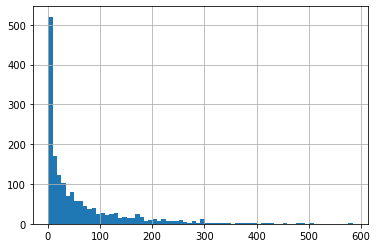

In [26]:
Ratings['RatingsCount'].hist(bins=70)

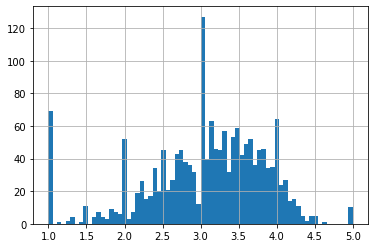

In [27]:
Ratings['Rating'].hist(bins=70)

C:\Users\srija\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


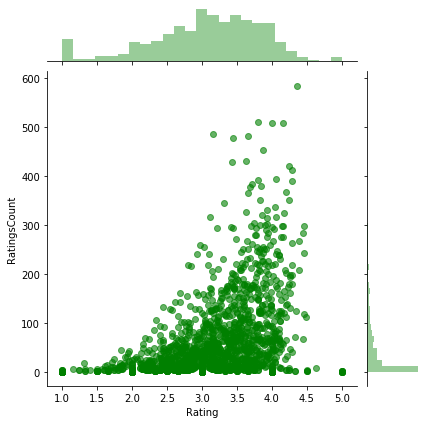

In [31]:
sns.jointplot(x='Rating', y = 'RatingsCount', data = Ratings, alpha = 0.6,color='g')

### Recommendation part of The movie

In [32]:
MovieCollections = Df.pivot_table(index = 'UserId', columns = 'Title', values='Rating')

In [33]:
MovieCollections.head(10)

Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
UserId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
Ratings.sort_values('RatingsCount',ascending=False).head(15)

,Rating,RatingsCount
Title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [36]:
### Please Choose two movies. So I choose the movies Liar Liar and Silence of the Lamb

In [39]:
LiarLiar = MovieCollections['Liar Liar (1997)']
SilenceOfTheLambs = MovieCollections['Silence of the Lambs, The (1991)']

In [40]:
LiarLiar.head(5)

UserId
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [41]:
SilenceOfTheLambs.head(5)

UserId
0    NaN
1    4.0
2    NaN
3    NaN
4    NaN
Name: Silence of the Lambs, The (1991), dtype: float64

### Correlation with the other movies Collections

In [42]:
SimilarityToLiarLiar = MovieCollections.corrwith(LiarLiar) ##check for movies which behave similar to LiarLiar movie

C:\Users\srija\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\srija\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [43]:
SimilarityToLiarLiar.head(10)

Title
'Til There Was You (1997)                      0.118913
1-900 (1994)                                        NaN
101 Dalmatians (1996)                          0.469765
12 Angry Men (1957)                            0.066272
187 (1997)                                     0.175145
2 Days in the Valley (1996)                    0.040739
20,000 Leagues Under the Sea (1954)           -0.027932
2001: A Space Odyssey (1968)                  -0.057864
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.400918
dtype: float64

In [44]:
SimilarityToSilenceOfTheLambs = MovieCollections.corrwith(SilenceOfTheLambs)##check for movies which behave similar to Silence of the lamb movie

C:\Users\srija\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\srija\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [45]:
SimilarityToSilenceOfTheLambs.head(10)

Title
'Til There Was You (1997)                      0.000000
1-900 (1994)                                  -0.188982
101 Dalmatians (1996)                          0.030939
12 Angry Men (1957)                            0.127202
187 (1997)                                     0.694740
2 Days in the Valley (1996)                    0.296968
20,000 Leagues Under the Sea (1954)            0.075414
2001: A Space Odyssey (1968)                   0.083431
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.514103
dtype: float64

In [46]:
### Remove all Nan

In [47]:
ResultantWithCorrLiarLiar = pd.DataFrame(SimilarityToLiarLiar, columns=['CorrelationValue'])##find movies similar to userrating

In [48]:
ResultantWithCorrLiarLiar.dropna(inplace=True)##remove nan values

In [49]:
ResultantWithCorrLiarLiar.head(10)

,CorrelationValue
Title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
"20,000 Leagues Under the Sea (1954)",-0.027932
2001: A Space Odyssey (1968),-0.057864
"39 Steps, The (1935)",0.400918
8 1/2 (1963),0.178064


In [51]:
ResultantWithCorrSilenceOfTheLambs = pd.DataFrame(SimilarityToSilenceOfTheLambs, columns=['CorrelationValue'])

In [52]:
ResultantWithCorrSilenceOfTheLambs.dropna(inplace=True)

In [53]:
ResultantWithCorrSilenceOfTheLambs.head(10)

,CorrelationValue
Title,
'Til There Was You (1997),0.000000
1-900 (1994),-0.188982
101 Dalmatians (1996),0.030939
12 Angry Men (1957),0.127202
187 (1997),0.694740
2 Days in the Valley (1996),0.296968
"20,000 Leagues Under the Sea (1954)",0.075414
2001: A Space Odyssey (1968),0.083431
"39 Steps, The (1935)",0.514103


In [54]:
### I ll search for movies which are perfectly correlated with Liar lIar and Silence of the lambs

In [55]:
ResultantWithCorrLiarLiar.sort_values('CorrelationValue',ascending=False).head(10)

,CorrelationValue
Title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
Mina Tannenbaum (1994),1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Legal Deceit (1997),1.0


In [56]:
ResultantWithCorrSilenceOfTheLambs.sort_values('CorrelationValue',ascending=False).head(10)

,CorrelationValue
Title,
Mrs. Dalloway (1997),1.0
Spirits of the Dead (Tre passi nel delirio) (1968),1.0
Year of the Horse (1997),1.0
"Cement Garden, The (1993)",1.0
"Journey of August King, The (1995)",1.0
"Jerky Boys, The (1994)",1.0
Infinity (1996),1.0
"Smile Like Yours, A (1997)",1.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0


In [57]:
ResultantWithCorrLiarLiar = ResultantWithCorrLiarLiar.join(Ratings['RatingsCount'], how = 'left', lsuffix = '_left', rsuffix = '_right')

In [58]:
ResultantWithCorrLiarLiar.head(10)

,CorrelationValue,RatingsCount
Title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
"20,000 Leagues Under the Sea (1954)",-0.027932,72
2001: A Space Odyssey (1968),-0.057864,259
"39 Steps, The (1935)",0.400918,59
8 1/2 (1963),0.178064,38


In [60]:
ResultantWithCorrSilenceOfTheLambs = ResultantWithCorrSilenceOfTheLambs.join(Ratings['RatingsCount'],how='left',lsuffix = '_left',rsuffix='_right')

In [61]:
ResultantWithCorrSilenceOfTheLambs.head(10)

,CorrelationValue,RatingsCount
Title,,
'Til There Was You (1997),0.000000,9
1-900 (1994),-0.188982,5
101 Dalmatians (1996),0.030939,109
12 Angry Men (1957),0.127202,125
187 (1997),0.694740,41
2 Days in the Valley (1996),0.296968,93
"20,000 Leagues Under the Sea (1954)",0.075414,72
2001: A Space Odyssey (1968),0.083431,259
"39 Steps, The (1935)",0.514103,59


In [62]:
### filter out the movies that have less than 100 reviews

In [65]:
ResultantWithCorrLiarLiar[ResultantWithCorrLiarLiar['RatingsCount']>100].sort_values('CorrelationValue', ascending=False).head(10)

,CorrelationValue,RatingsCount
Title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


In [66]:
ResultantWithCorrSilenceOfTheLambs[ResultantWithCorrSilenceOfTheLambs['RatingsCount']>100].sort_values('CorrelationValue', ascending=False).head(10)

,CorrelationValue,RatingsCount
Title,,
"Silence of the Lambs, The (1991)",1.000000,390
Alien: Resurrection (1997),0.408675,124
Basic Instinct (1992),0.403709,101
"Crying Game, The (1992)",0.370926,119
Shine (1996),0.368361,129
Dave (1993),0.358544,180
"Long Kiss Goodnight, The (1996)",0.353039,185
"Boot, Das (1981)",0.351619,201
M*A*S*H (1970),0.335937,206


### Completed project